In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

print(matches.head())
print(deliveries.head())

   id  season       city        date                        team1  \
0   1    2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2    2017       Pune  06-04-2017               Mumbai Indians   
2   3    2017     Rajkot  07-04-2017                Gujarat Lions   
3   4    2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5    2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [12]:
print("Matches dataset info:")
print(matches.info())

Matches dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3      

In [16]:
print("Deliveries dataset info:")
print(deliveries.info())

Deliveries dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs   

Data Cleaning

In [20]:
# Check missing values
print(matches.isnull().sum())

# Drop irrelevant columns
if 'umpire3' in matches.columns:
    matches.drop(columns=['umpire3'], inplace=True)

# Fill missing values for winner (abandoned matches)
matches['winner'].fillna('No Result', inplace=True)


id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64


In [38]:
# Total matches played per team
team_matches = matches['team1'].value_counts() + matches['team2'].value_counts()

# Total wins per team
team_wins = matches['winner'].value_counts()

# Win Percentage
win_percentage = (team_wins / team_matches * 100).round(2).sort_values(ascending=False)
print("Team Win Percentage:")
print(win_percentage)


Team Win Percentage:
Delhi Capitals                 62.50
Rising Pune Supergiant         62.50
Chennai Super Kings            60.98
Mumbai Indians                 58.29
Sunrisers Hyderabad            53.70
Kolkata Knight Riders          51.69
Rajasthan Royals               51.02
Royal Challengers Bangalore    46.67
Kings XI Punjab                46.59
Gujarat Lions                  43.33
Kochi Tuskers Kerala           42.86
Delhi Daredevils               41.61
Deccan Chargers                38.67
Rising Pune Supergiants        35.71
Pune Warriors                  26.09
No Result                        NaN
Name: count, dtype: float64


Season Analysis

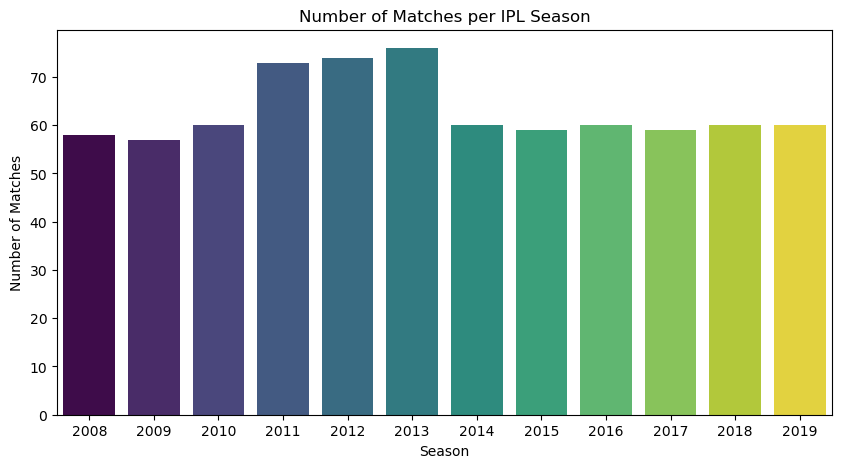

In [28]:
season_matches = matches['season'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(
    x=season_matches.index,
    y=season_matches.values,
    hue=season_matches.index,    # Assign hue
    palette='viridis',
    dodge=False,                 # Bars stay in same place
    legend=False                 # Hide legend since hue = x
)

plt.title("Number of Matches per IPL Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()



Team Performance Analysis

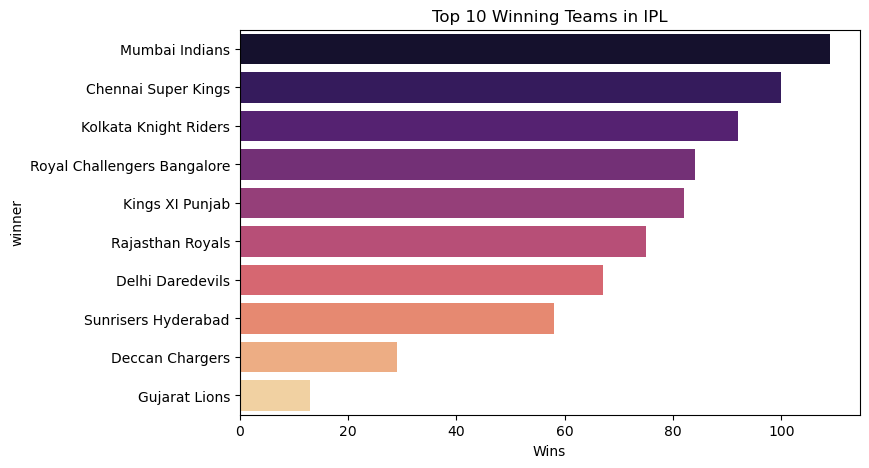

Toss winning team also won the match: 51.98%


In [30]:
# Top 10 winning teams
top_winners = matches['winner'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_winners.values, y=top_winners.index, palette='magma')
plt.title("Top 10 Winning Teams in IPL")
plt.xlabel("Wins")
plt.show()

# Toss winning impact
toss_winner_match = matches[matches['toss_winner'] == matches['winner']]
percentage = len(toss_winner_match) / len(matches) * 100
print(f"Toss winning team also won the match: {percentage:.2f}%")


 Player Performance Analysis

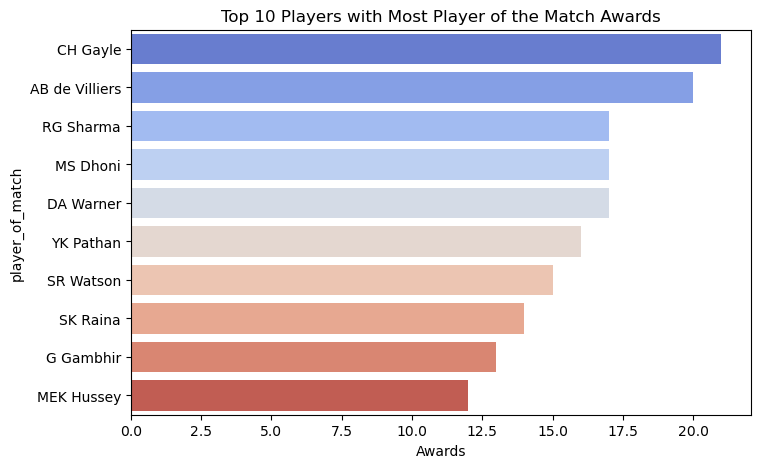

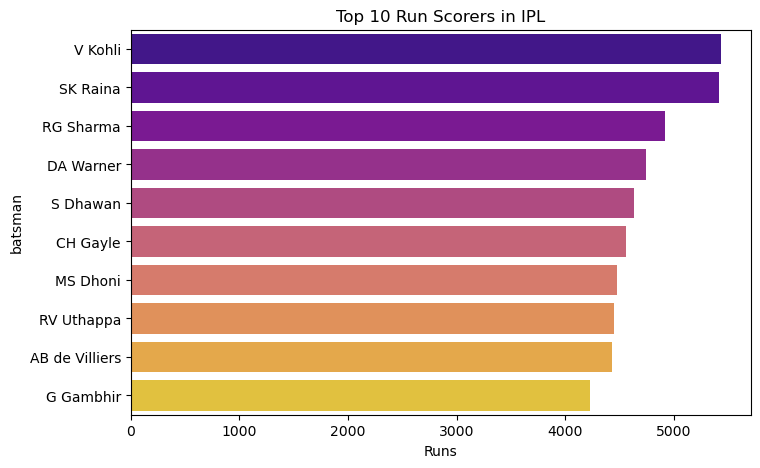

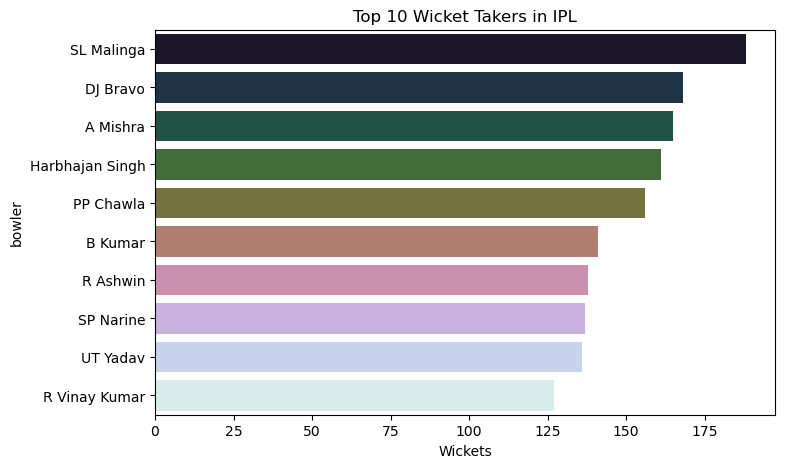

In [32]:
# Player of the match
pom = matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=pom.values, y=pom.index, palette='coolwarm')
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.xlabel("Awards")
plt.show()

# Top 10 run scorers
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='plasma')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Runs")
plt.show()

# Top 10 wicket takers
wickets = deliveries[deliveries['dismissal_kind'].notnull()]
top_bowlers = wickets.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='cubehelix')
plt.title("Top 10 Wicket Takers in IPL")
plt.xlabel("Wickets")
plt.show()


 Venue Analysis

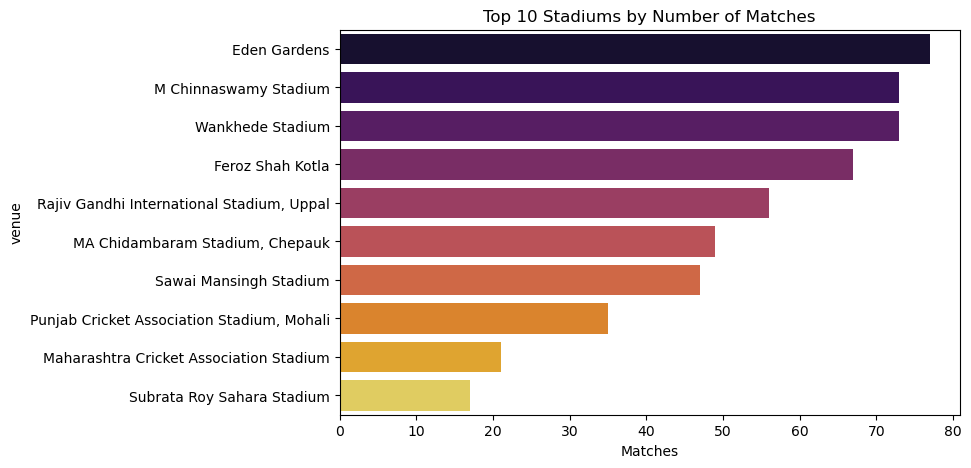

In [34]:
venue_matches = matches['venue'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=venue_matches.values, y=venue_matches.index, palette='inferno')
plt.title("Top 10 Stadiums by Number of Matches")
plt.xlabel("Matches")
plt.show()


Toss Impact per Venue

In [40]:
toss_impact = matches.groupby('venue').apply(
    lambda x: (x['toss_winner'] == x['winner']).sum() / len(x) * 100
).sort_values(ascending=False)

print("Toss Winning Impact by Venue (%):")
print(toss_impact.head(10))


Toss Winning Impact by Venue (%):
venue
ACA-VDCA Stadium           100.000000
OUTsurance Oval            100.000000
Green Park                 100.000000
Holkar Cricket Stadium      77.777778
IS Bindra Stadium           71.428571
Barabati Stadium            71.428571
Feroz Shah Kotla Ground     71.428571
Sheikh Zayed Stadium        71.428571
SuperSport Park             66.666667
De Beers Diamond Oval       66.666667
dtype: float64


Player Consistency (Runs & Strike Rate)

In [42]:
# Calculate total runs and balls for each batsman
batsman_stats = deliveries.groupby('batsman').agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count')
)

batsman_stats['strike_rate'] = (batsman_stats['runs'] / batsman_stats['balls'] * 100).round(2)
batsman_stats = batsman_stats.sort_values(by='runs', ascending=False).head(10)

print("Top 10 Batsmen with Strike Rate:")
print(batsman_stats)


Top 10 Batsmen with Strike Rate:
                runs  balls  strike_rate
batsman                                 
V Kohli         5434   4211       129.04
SK Raina        5415   4044       133.90
RG Sharma       4914   3816       128.77
DA Warner       4741   3398       139.52
S Dhawan        4632   3776       122.67
CH Gayle        4560   3131       145.64
MS Dhoni        4477   3318       134.93
RV Uthappa      4446   3492       127.32
AB de Villiers  4428   2977       148.74
G Gambhir       4223   3524       119.84


Death Overs Performance (16–20)

In [44]:
# Filter death overs
death_overs = deliveries[(deliveries['over'] >= 16) & (deliveries['over'] <= 20)]

# Team performance in death overs
death_runs = death_overs.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
print("Top Teams in Death Overs (16-20):")
print(death_runs)


Top Teams in Death Overs (16-20):
batting_team
Mumbai Indians                 8591
Royal Challengers Bangalore    7881
Chennai Super Kings            7605
Kings XI Punjab                7302
Kolkata Knight Riders          7164
Delhi Daredevils               6307
Rajasthan Royals               5740
Sunrisers Hyderabad            4576
Deccan Chargers                3133
Pune Warriors                  1733
Gujarat Lions                  1159
Delhi Capitals                  686
Rising Pune Supergiant          681
Rising Pune Supergiants         530
Kochi Tuskers Kerala            390
Name: total_runs, dtype: int64


Boundary Analysis (4s & 6s)

In [46]:
# Count 4s and 6s
boundaries = deliveries[deliveries['batsman_runs'].isin([4,6])]

boundary_counts = boundaries.groupby('batting_team')['batsman_runs'].value_counts().unstack().fillna(0)
boundary_counts.columns = ['Fours','Sixes']
boundary_counts['Total Boundaries'] = boundary_counts['Fours'] + boundary_counts['Sixes']

print(boundary_counts.sort_values('Total Boundaries', ascending=False))


                             Fours  Sixes  Total Boundaries
batting_team                                               
Mumbai Indians                2588   1096              3684
Royal Challengers Bangalore   2360   1132              3492
Kings XI Punjab               2458    976              3434
Kolkata Knight Riders         2434    930              3364
Chennai Super Kings           2193    973              3166
Delhi Daredevils              2158    801              2959
Rajasthan Royals              2035    681              2716
Sunrisers Hyderabad           1444    533              1977
Deccan Chargers                957    400              1357
Pune Warriors                  525    196               721
Gujarat Lions                  460    155               615
Delhi Capitals                 242     87               329
Rising Pune Supergiant         197     89               286
Rising Pune Supergiants        171     68               239
Kochi Tuskers Kerala           170     5

Save Extended Insights

In [48]:
# Save insights
win_percentage.to_csv("team_win_percentage.csv")
toss_impact.to_csv("toss_impact_by_venue.csv")
batsman_stats.to_csv("top_batsmen_strike_rate.csv")
death_runs.to_csv("death_overs_performance.csv")
boundary_counts.to_csv("boundary_analysis.csv")

print("Extended insights saved successfully!")


Extended insights saved successfully!


In [ ]:
Generate Insights & Save Results

In [36]:
summary = {
    "Top Winning Teams": top_winners.to_dict(),
    "Top Run Scorers": top_batsmen.to_dict(),
    "Top Wicket Takers": top_bowlers.to_dict()
}

summary_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in summary.items()]))
summary_df.to_csv("ipl_summary.csv", index=False)
print("Summary saved to ipl_summary.csv")


Summary saved to ipl_summary.csv
